In [166]:
import numpy as np
import scipy
import scipy.stats as stats

# Machine learning package.
import sklearn

# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [168]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('housingUnits.csv')

# Remove rows with NaN values
df = df.dropna()

# Convert back to NumPy array (if needed)
data = df.to_numpy()
print(data.shape)

(20640, 8)


Correlation Coefficient between total_rooms and median_house_value: 0.1341531138065631
Correlation Coefficient between total_bedrooms and median_house_value: 0.13415369857008883
Correlation Coefficient between population and median_house_value: -0.024649678888894907
Correlation Coefficient between households and median_house_value: 0.06584265057005648


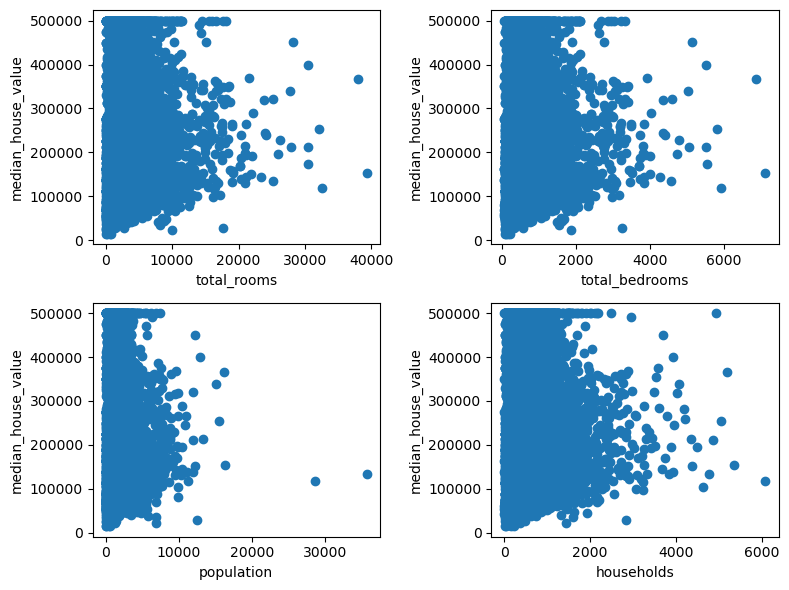

In [98]:
# QUESTION 1
# we determine why variables 4 and 5 cannot predict well by themselves by calculating correlation coefficients and graphing a scatter plot
df = pd.read_csv('housingUnits.csv')
data = df.to_numpy()
# we can calculate the correlation coefficient between variable 'total_rooms' and variable 'median_house_value'
corr_matrix = np.corrcoef(data[:,1], data[:,-1])
correlation = corr_matrix[0, 1] 
print("Correlation Coefficient between total_rooms and median_house_value:", correlation)
# we can calculate the correlation coefficient between variable 'total_bedrooms' and variable 'median_house_value'
corr_matrix = np.corrcoef(data[:,2], data[:,-1])
correlation = corr_matrix[0, 1] 
print("Correlation Coefficient between total_bedrooms and median_house_value:", correlation)
# we can calculate the correlation coefficient between variable 'population' and variable 'median_house_value'
corr_matrix = np.corrcoef(data[:,3], data[:,-1])
correlation = corr_matrix[0, 1] 
print("Correlation Coefficient between population and median_house_value:", correlation)
# we can calculate the correlation coefficient between variable 'households' and variable 'median_house_value'
corr_matrix = np.corrcoef(data[:,4], data[:,-1])
correlation = corr_matrix[0, 1] 
print("Correlation Coefficient between households and median_house_value:", correlation)
# we can draw scatterplots to help support if linear relationship exists
fig,axes = plt.subplots(2,2,figsize = (8,6))
axes[0,0].scatter(data[:,1],data[:,-1])
axes[0,0].set_xlabel('total_rooms')
axes[0,0].set_ylabel('median_house_value')
axes[0,1].scatter(data[:,2],data[:,-1])
axes[0,1].set_xlabel('total_bedrooms')
axes[0,1].set_ylabel('median_house_value')
axes[1,0].scatter(data[:,3],data[:,-1])
axes[1,0].set_xlabel('population')
axes[1,0].set_ylabel('median_house_value')
axes[1,1].scatter(data[:,4],data[:,-1])
axes[1,1].set_xlabel('households')
axes[1,1].set_ylabel('median_house_value')

plt.tight_layout()
plt.show()

In [130]:
# QUESTION 2
# We calculate the correlation coefficient between predictors to make comparison
df = pd.read_csv('housingUnits.csv')
data1 = df.to_numpy()
data2 = df.to_numpy()
data1[:,1] = data1[:,1] / data1[:,3]
data1[:,2] = data1[:,2] / data1[:,3]
corr_matrix = np.corrcoef(data1[:,1], data1[:,2])
correlation = corr_matrix[0, 1] 
print("Correlation Coefficient after normalized by population:", correlation)
data2[:,1] = data2[:,1] / data2[:,4]
data2[:,2] = data2[:,2] / data2[:,4]
corr_matrix = np.corrcoef(data2[:,1], data2[:,2])
correlation = corr_matrix[0, 1] 
print("Correlation Coefficient after normalized by households:", correlation)

Correlation Coefficient after normalized by population: 0.6414637002481957
Correlation Coefficient after normalized by households: 0.5187238864208912


R^2 value when total rooms normalized by population :  0.04388269533891975
R^2 value when total bedrooms normalized by population :  0.012790501296178869
R^2 value when total rooms normalized by households :  0.023088282755354017
R^2 value when total bedrooms normalized by households :  0.003394278159693398


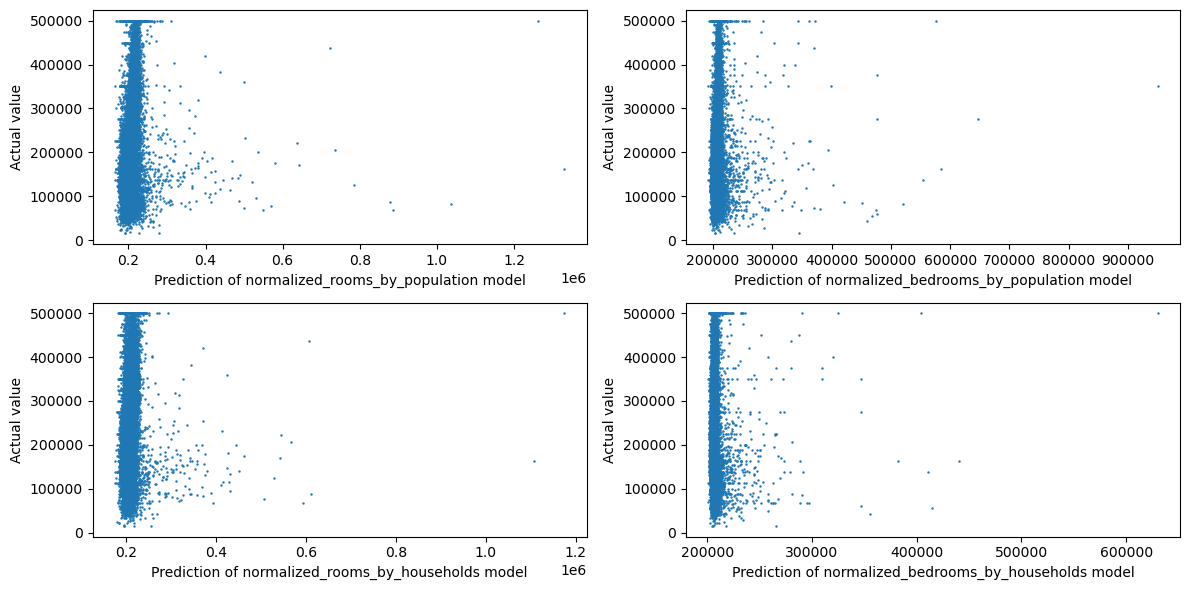

In [114]:
# QUESTION 2
# we build several simple linear regression models and calculate R^2 to compare their performances
df = pd.read_csv('housingUnits.csv')
data = df.to_numpy()
from sklearn.linear_model import LinearRegression
normalized_rooms_by_population = data[:,1:2] / data[:,3:4]
normalized_bedrooms_by_population = data[:,2:3] / data[:,3:4]
normalized_rooms_by_households = data[:,1:2] / data[:,4:5]
normalized_bedrooms_by_households = data[:,2:3] / data[:,4:5]
y_sub = data[:,-1]

# we fit the model and get the estimated parameters here
model1 = LinearRegression().fit(normalized_rooms_by_population,y_sub)
model2 = LinearRegression().fit(normalized_bedrooms_by_population,y_sub)
model3 = LinearRegression().fit(normalized_rooms_by_households,y_sub)
model4 = LinearRegression().fit(normalized_bedrooms_by_households,y_sub)

# we calculate for the R^2 value here
rSqr1 = model1.score(normalized_rooms_by_population,y_sub)
rSqr2 = model2.score(normalized_bedrooms_by_population,y_sub)
rSqr3 = model3.score(normalized_rooms_by_households,y_sub)
rSqr4 = model4.score(normalized_bedrooms_by_households,y_sub)
print("R^2 value when total rooms normalized by population : ", rSqr1)
print("R^2 value when total bedrooms normalized by population : ", rSqr2)
print("R^2 value when total rooms normalized by households : ", rSqr3)
print("R^2 value when total bedrooms normalized by households : ", rSqr4)

# we graph the scatter plot to figure out how the prediction value deviates from the actual value
fig,axes = plt.subplots(2,2,figsize = (12,6))
yHat1 = model1.predict(normalized_rooms_by_population) 
axes[0,0].plot(yHat1,y_sub,'o',markersize=.75)
axes[0,0].set_xlabel('Prediction of normalized_rooms_by_population model') 
axes[0,0].set_ylabel('Actual value')  

yHat2 = model2.predict(normalized_bedrooms_by_population) 
axes[0,1].plot(yHat2,y_sub,'o',markersize=.75)
axes[0,1].set_xlabel('Prediction of normalized_bedrooms_by_population model') 
axes[0,1].set_ylabel('Actual value')  

yHat3 = model3.predict(normalized_rooms_by_households) 
axes[1,0].plot(yHat3,y_sub,'o',markersize=.75)
axes[1,0].set_xlabel('Prediction of normalized_rooms_by_households model') 
axes[1,0].set_ylabel('Actual value')  

yHat4 = model4.predict(normalized_bedrooms_by_households) 
axes[1,1].plot(yHat4,y_sub,'o',markersize=.75)
axes[1,1].set_xlabel('Prediction of normalized_bedrooms_by_households model') 
axes[1,1].set_ylabel('Actual value')  

plt.tight_layout()

['R^2 value of housing_median_age: 0.011156305266710742'
 'R^2 value of total_rooms: 0.023088282755354017'
 'R^2 value of total_bedrooms: 0.003394278159693398'
 'R^2 value of population: 0.0006076066693256887'
 'R^2 value of households: 0.0043352546340906795'
 'R^2 value of median_income: 0.47344749180719903'
 'R^2 value of ocean_proximity: 0.15780848616855137']
Skewness of median_house_value distribution: 0.9776922140978416
Kurtosis of median_house_value distribution: 0.3275001388119616


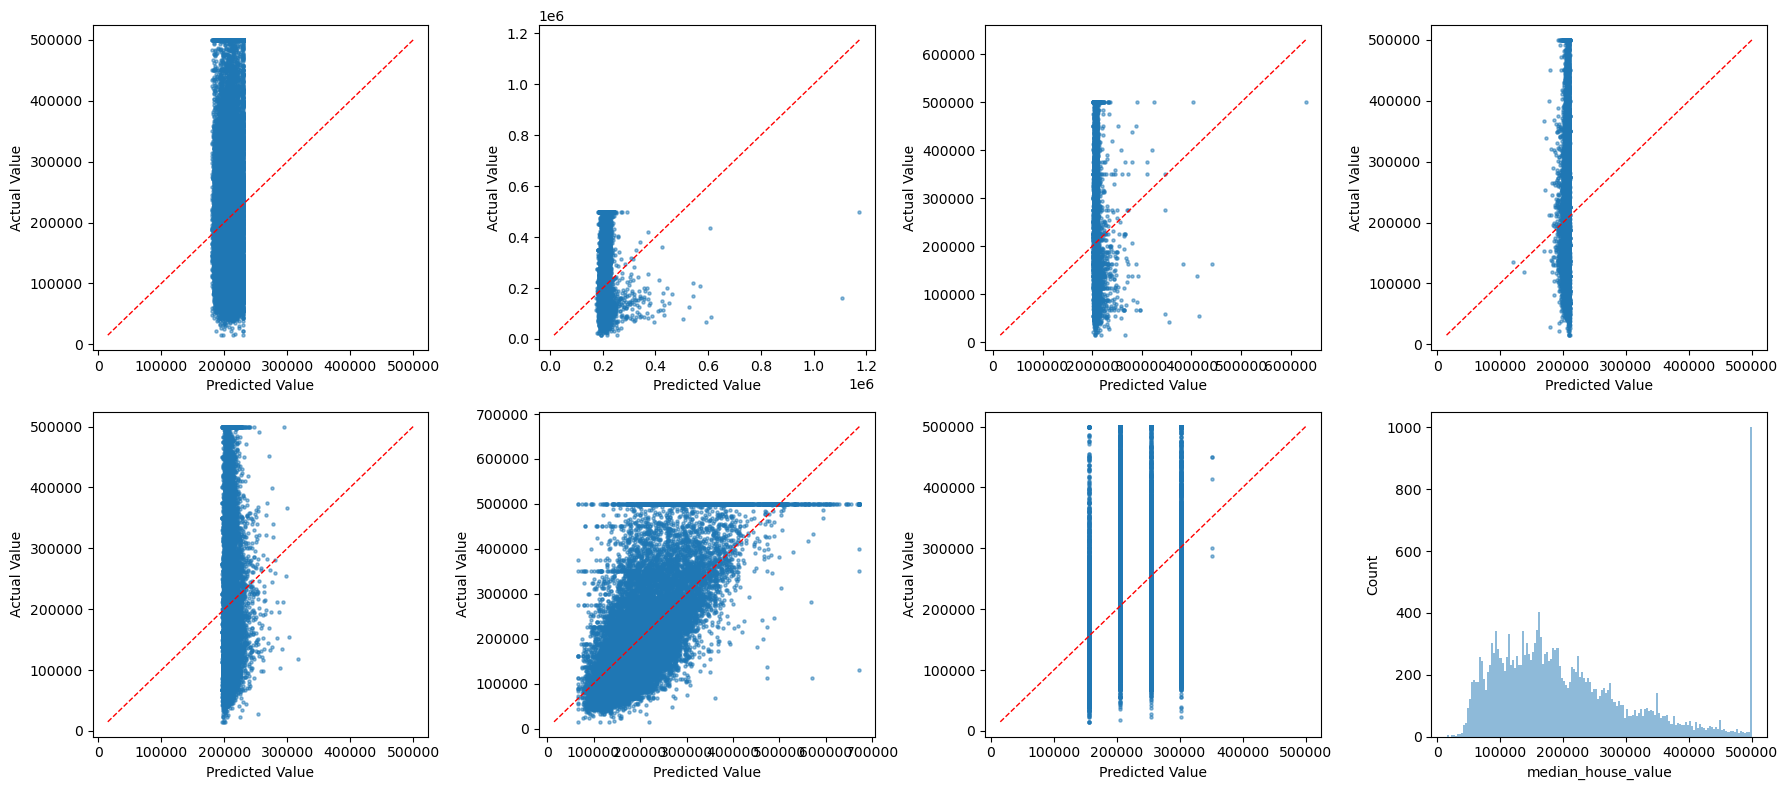

In [170]:
# QUESTION 3
# We had to create linear regression model for each variable, graph the scatter plot
# We need to calculate the R^2 value for each model to compare
# Corrected Data Normalization
data[:,1] = data[:,1] / data[:,4]
data[:,2] = data[:,2] / data[:,4]

# Replace invalid values with zeros if necessary
data = np.nan_to_num(data, nan=0.0, posinf=0.0, neginf=0.0)

# Linear Regression and Visualization
R_square = np.array([])
fig, axes = plt.subplots(2, 4, figsize=(18, 8))

for i in range(data.shape[1] - 1):
    X_sub = data[:,i:i+1]
    y_sub = data[:,-1:]
    
    model = LinearRegression().fit(X_sub, y_sub)
    rSqr = model.score(X_sub, y_sub)
    R_square = np.append(R_square, f'R^2 value of {header[i]}: {rSqr}')
    
    row = i // 4
    col = i % 4
    yHat = model.predict(X_sub)
    
    axes[row, col].scatter(yHat, y_sub, s=5, alpha=0.5)
    axes[row, col].set_xlabel('Predicted Value')
    axes[row, col].set_ylabel('Actual Value')
    
    min_val = min(y_sub.min(), yHat.min())
    max_val = max(y_sub.max(), yHat.max())
    axes[row, col].plot([min_val, max_val], [min_val, max_val], 
                        color='red', linestyle='--', linewidth=1)

# Histogram for the Target Variable
axes[1, 3].hist(data[:,-1], bins=150, alpha=0.5)
axes[1, 3].set_xlabel('median_house_value')
axes[1, 3].set_ylabel('Count')

# Skewness and Kurtosis Calculation
column_data = data[:,-1]
skewness = stats.skew(column_data)
kurtosis = stats.kurtosis(column_data, fisher=True)

plt.tight_layout()
print(R_square)
print(f"Skewness of median_house_value distribution: {skewness}")
print(f"Kurtosis of median_house_value distribution: {kurtosis}")

R^2 value when putting predictors together :  0.599162410783781


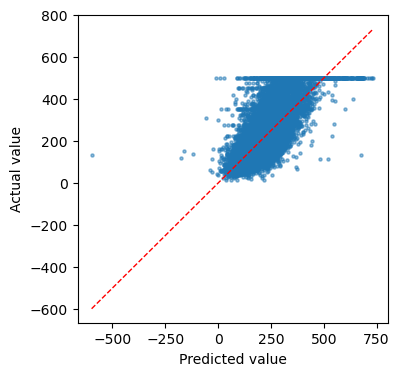

In [173]:
# QUESTION 4
# we had to build a multiple linear regression model, taking all seven predictors together
df = pd.read_csv('housingUnits.csv')
data = df.to_numpy()
data[:,1:2] = data[:,1:2] / data[:,4:5]
data[:,2:3] = data[:,2:3] / data[:,4:5]
X = np.hstack((np.ones((data.shape[0],1)),data[:,:-1]))
y_sub = data[:,-1:]/1e3

model = LinearRegression().fit(X,y_sub)
rSqr = model.score(X,y_sub)
print("R^2 value when putting predictors together : ", rSqr)

yHat = model.predict(X)
fig, axes = plt.subplots(figsize=(4, 4))
axes.scatter(yHat, y_sub, s=5, alpha=0.5)
axes.set_xlabel('Predicted value')
axes.set_ylabel('Actual value')
min_val = min(y_sub.min(), yHat.min())  
max_val = max(y_sub.max(), yHat.max()) 
axes.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1)

In [ ]:
data[:,1:2] = data[:,1:2] / data[:,4:5]
data[:,2:3] = data[:,2:3] / data[:,4:5]
df = pd.DataFrame(data, columns=['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity','median_house_value'])
pd.plotting.scatter_matrix(df, figsize=(12, 12))

Correlation Coefficient: 0.5187238864208912


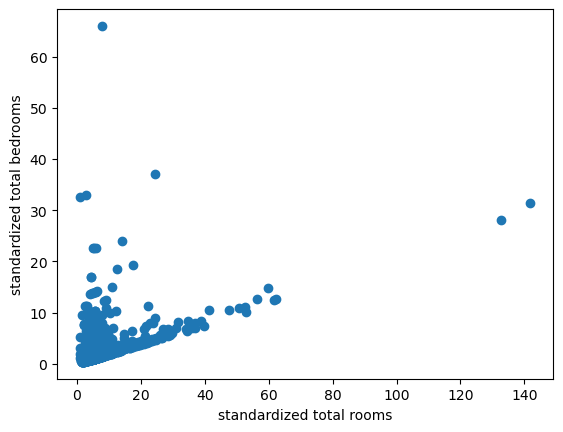

In [27]:
# QUESTION 5
df = pd.read_csv('housingUnits.csv')
data = df.to_numpy()
data[:,1] = data[:,1]/data[:,4]
data[:,2] = data[:,2]/data[:,4]

# we calculate the correlation coefficient between variables 2 and 3 to decide on the collinearity between them
corr_matrix = np.corrcoef(data[:,1], data[:,2])
correlation = corr_matrix[0, 1] 
print("Correlation Coefficient:", correlation)

# we graph the scatter plots of variable 2 vs. variable 3
plt.scatter(data[:,1],data[:,2])
plt.xlabel('standardized total rooms')
plt.ylabel('standardized total bedrooms')
plt.show()

Correlation Coefficient: 0.9072222660959615


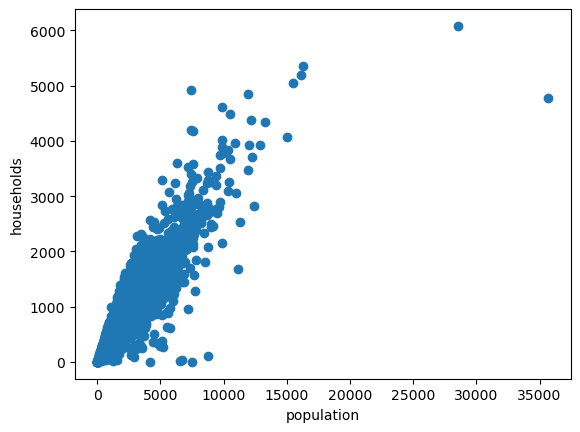

In [29]:
# QUESTION 5
df = pd.read_csv('housingUnits.csv')
data = df.to_numpy()

# we calculate the correlation coefficient between variables 4 and 5 to decide on the collinearity between them
corr_matrix = np.corrcoef(data[:,3], data[:,4])
correlation = corr_matrix[0, 1] 
print("Correlation Coefficient:", correlation)

# we graph the scatter plots of variable 4 vs. variable 5
plt.scatter(data[:,3],data[:,4])
plt.xlabel('population')
plt.ylabel('households')
plt.show()

Skewness of housing_median_age distribution: 0.06032625301661101
Kurtosis of housing_median_age distribution: -0.8007255995444988

Skewness of total_rooms distribution: 20.69636472075092
Kurtosis of total_rooms distribution: 879.1399661167022

Skewness of total_bedrooms distribution: 24.383276448187598
Kurtosis of total_bedrooms distribution: 1048.473108306052

Skewness of population distribution: 4.93549950885852
Kurtosis of population distribution: 73.53500881922278

Skewness of households distribution: 3.4101898550856307
Kurtosis of households distribution: 22.052354233642966

Skewness of median_income distribution: 1.6465370299000808
Kurtosis of median_income distribution: 4.951033760409661

Skewness of ocean_proximity distribution: -0.7307349974630019
Kurtosis of ocean_proximity distribution: -0.29024910539264726

Skewness of median_house_value distribution: 0.9776922140978416
Kurtosis of median_house_value distribution: 0.3275001388119616



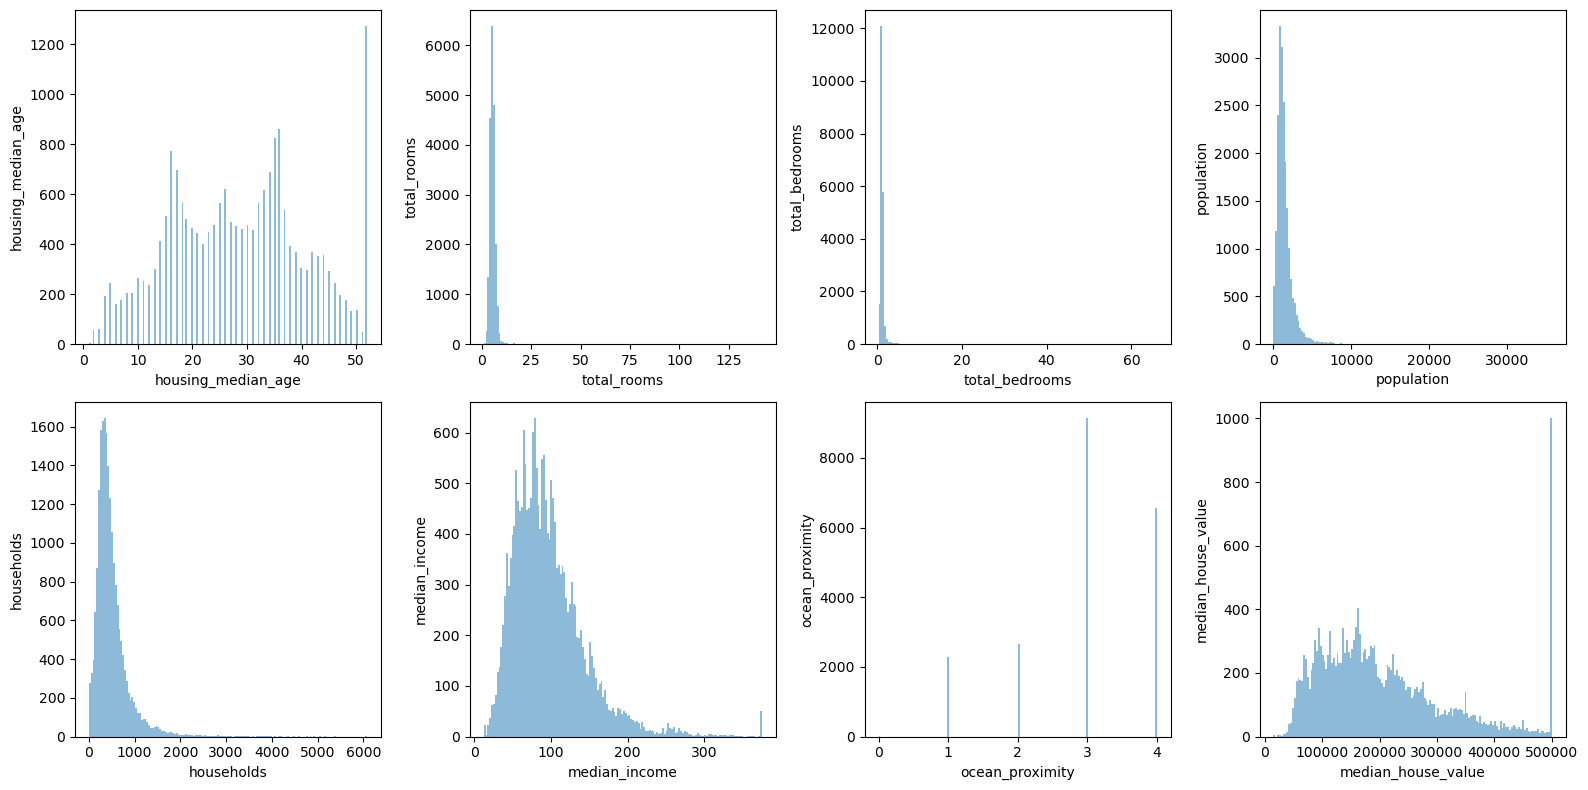

In [162]:
# EXTRA CREDIT 1/2
# we had to plot the histogram of distribution for each variable to detect if they follow a normal distribution
# we calculate for the skewness and kurtosis to seek for numerical clues.
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
header = df.columns
data[:,1] = data[:,1] / data[:,4]
data[:,2] = data[:,2] / data[:,4]
for i in range(data.shape[1]):
    row = i // 4
    col = i % 4  
    axes[row, col].hist(data[:,i], bins=150, alpha = 0.5)
    axes[row,col].set_xlabel(f'{header[i]}')
    axes[row,col].set_ylabel(f'{header[i]}')
    column_data = data[:,i]
    skewness = stats.skew(column_data)
    kurtosis = stats.kurtosis(column_data, fisher=True)
    print(f"Skewness of {header[i]} distribution: {skewness}")
    print(f"Kurtosis of {header[i]} distribution: {kurtosis}")
    print()
plt.tight_layout()